In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

In [2]:
health = pd.read_csv ("Resources/Food_Inspections.csv") 
health.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2345928,ALBANY CHILD CARE CENTER,ALBANY CHILD CARE CENTER,2215697.0,Daycare Above and Under 2 Years,Risk 1 (High),5954 S ALBANY AVE,CHICAGO,IL,60629.0,11/19/2019,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.784667,-87.701011,"(41.784667360966026, -87.7010111792713)"
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
2,2078297,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,8/11/2017,License,Pass,NaN,NaN,NaN,NaN
3,2369894,"JIMMY'S FOOD & DELI,INC",JIMMY'S FOOD & DELI,2511672.0,Grocery Store,Risk 2 (Medium),5601 W MADISON ST,CHICAGO,IL,60644.0,4/29/2020,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880135,-87.764942,"(41.880135062255434, -87.7649424467103)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"


In [40]:
income_df = pd.read_csv ("Resources/Median_Income.csv")

income_df

,#,Zip,Location,City,Population,Avg. Income/H/hold,National Rank
0,1,60606.0,"41.881988, -87.637329","Chicago, Illinois","1,682","$100,377.00",#259
1,2,60601.0,"41.885805, -87.622911","Chicago, Illinois","5,591","$77,374.00",#961
2,3,60611.0,"41.893024, -87.618998","Chicago, Illinois","26,522","$69,889.00","#1,558"
3,4,60614.0,"41.922667, -87.652537","Chicago, Illinois","65,474","$68,324.00","#1,712"
4,5,60603.0,"41.880614, -87.629311","Chicago, Illinois",378,"$61,815.00","#2,591"
5,6,60655.0,"41.694722, -87.703687","Chicago, Illinois","29,138","$59,849.00","#3,052"
6,7,60646.0,"41.992931, -87.760278","Chicago, Illinois","27,016","$58,232.00","#3,331"
7,8,60605.0,"41.857651, -87.615592","Chicago, Illinois","12,423","$56,151.00","#3,829"
8,9,60657.0,"41.938964, -87.656811","Chicago, Illinois","66,789","$55,647.00","#3,962"
9,10,60631.0,"41.994948, -87.813225","Chicago, Illinois","28,832","$55,316.00","#4,054"


KeyError: 'Avg. Income/H/hold'

In [4]:
#check for null values
health.isnull().values.any()

True

In [5]:
#view columns with null values
null_columns=health.columns[health.isnull().any()]
health[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [6]:
# filter the dataset by facility type =restaurant and look at its shape
restaurants = health[health['Facility Type']=="Restaurant"]
print(restaurants.shape)

(138590, 17)


In [7]:
restaurants.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [8]:
#resturants with known locations
restaurants_df = restaurants[restaurants['Location'].notna()]
restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [9]:
print(restaurants_df.shape)

(138457, 17)


In [10]:
#count number of restaurants in each zip

count_by_zip = restaurants_df.groupby(["Zip"]).count()["Location"]
count_by_zip

Zip
60601.0    3167
60602.0    1332
60603.0    1852
60604.0    1209
60605.0    2707
60606.0    3019
60607.0    4487
60608.0    3339
60609.0    2249
60610.0    3221
60611.0    5701
60612.0    1553
60613.0    3431
60614.0    6260
60615.0    1571
60616.0    3526
60617.0    2090
60618.0    4169
60619.0    2014
60620.0    1926
60621.0     609
60622.0    4825
60623.0    2428
60624.0     938
60625.0    3961
60626.0    2138
60628.0    1646
60629.0    2232
60630.0    1808
60631.0     980
60632.0    2955
60633.0     230
60634.0    2633
60636.0    1109
60637.0    1242
60638.0    1905
60639.0    3257
60640.0    3794
60641.0    2497
60642.0    1761
60643.0    1581
60644.0    1234
60645.0     800
60646.0     981
60647.0    5404
60649.0    1163
60651.0    1385
60652.0    1153
60653.0     961
60654.0    4221
60655.0     531
60656.0     561
60657.0    5930
60659.0    2922
60660.0    2262
60661.0    2456
60666.0    2340
60707.0     766
60827.0      12
Name: Location, dtype: int64

In [11]:
count_by_zip.count()

59

In [12]:
#Restaurants with Risk 1 violations

zip_df = restaurants_df.loc[restaurants_df["Risk"] == 'Risk 1 (High)']
zip_df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,7/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,3/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,5/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208242,1578360,POLANCO CLASSIC LATINO STEAKHOUSE,CANDELA LATIN CUISINE AND BAR,1968878.0,Restaurant,Risk 1 (High),2451 N MILWAUKEE AVE,CHICAGO,IL,60647.0,9/24/2015,Canvass,Out of Business,NaN,41.925848,-87.701919,"(41.92584754725672, -87.70191910956856)"
208246,2363192,HONKY TONK BARBEQUE,HONKY TONK BARBEQUE,1987119.0,Restaurant,Risk 1 (High),1800 S RACINE AVE,CHICAGO,IL,60608.0,3/3/2020,Complaint,Pass,NaN,41.857882,-87.656574,"(41.85788239331137, -87.65657385684578)"
208250,1559555,JOHNNY'S GRILL I,JOHNNY'S GRILL I,2368611.0,Restaurant,Risk 1 (High),2545-2547 N KEDZIE BLVD,CHICAGO,IL,60647.0,6/25/2015,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.927879,-87.706925,"(41.92787854149625, -87.70692518909259)"
208252,1751404,RAYMOND'S HAMBURGERS & TACOS,RAYMOND'S HAMBURGERS & TACOS,26528.0,Restaurant,Risk 1 (High),2404 S BLUE ISLAND AVE,CHICAGO,IL,60608.0,4/5/2016,Canvass Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.848781,-87.675429,"(41.84878118113963, -87.67542917644128)"


In [13]:
restaurants_df["Risk"].value_counts()

Risk 1 (High)      111041
Risk 2 (Medium)     25939
Risk 3 (Low)         1465
All                     9
Name: Risk, dtype: int64

In [14]:
#Number of High Risk Restaurants by Zip code

count_of_risk = zip_df.groupby(["Zip"]).count()["Location"]
count_of_risk

Zip
60601.0    2556
60602.0    1081
60603.0    1568
60604.0     893
60605.0    2106
60606.0    2534
60607.0    3865
60608.0    2690
60609.0    1706
60610.0    2795
60611.0    4789
60612.0    1100
60613.0    2803
60614.0    5266
60615.0    1175
60616.0    2919
60617.0    1486
60618.0    3612
60619.0    1250
60620.0    1124
60621.0     261
60622.0    4026
60623.0    2053
60624.0     489
60625.0    3387
60626.0    1778
60628.0     938
60629.0    1771
60630.0    1523
60631.0     821
60632.0    2385
60633.0     183
60634.0    2243
60636.0     612
60637.0     846
60638.0    1378
60639.0    2555
60640.0    3332
60641.0    2122
60642.0    1410
60643.0    1103
60644.0     792
60645.0     687
60646.0     882
60647.0    4581
60649.0     762
60651.0     809
60652.0     810
60653.0     680
60654.0    3656
60655.0     390
60656.0     507
60657.0    5117
60659.0    2637
60660.0    1836
60661.0    2117
60666.0    1637
60707.0     596
60827.0       4
Name: Location, dtype: int64

In [38]:
count_by_zip.count()

59

In [16]:
#percentage of high risk restaurants

percent= count_of_risk/count_by_zip  *100
percent

Zip
60601.0    80.707294
60602.0    81.156156
60603.0    84.665227
60604.0    73.862696
60605.0    77.798301
60606.0    83.935078
60607.0    86.137731
60608.0    80.563043
60609.0    75.855936
60610.0    86.774294
60611.0    84.002807
60612.0    70.830650
60613.0    81.696298
60614.0    84.121406
60615.0    74.793125
60616.0    82.785026
60617.0    71.100478
60618.0    86.639482
60619.0    62.065541
60620.0    58.359294
60621.0    42.857143
60622.0    83.440415
60623.0    84.555189
60624.0    52.132196
60625.0    85.508710
60626.0    83.161833
60628.0    56.986634
60629.0    79.345878
60630.0    84.236726
60631.0    83.775510
60632.0    80.710660
60633.0    79.565217
60634.0    85.187998
60636.0    55.184851
60637.0    68.115942
60638.0    72.335958
60639.0    78.446423
60640.0    87.822878
60641.0    84.981978
60642.0    80.068143
60643.0    69.765971
60644.0    64.181524
60645.0    85.875000
60646.0    89.908257
60647.0    84.770540
60649.0    65.520206
60651.0    58.411552
60652.0  

In [17]:
data = pd.DataFrame({"Number of Restaurants":count_by_zip,"Number of Risk 1(High)":count_of_risk, "Percentage of High Risk":percent})
                     
data.style.format({'Percentge of High Risk':"{:.2f}%"})


,Number of Restaurants,Number of Risk 1(High),Percentage of High Risk
Zip,,,
60601.0,3167,2556,80.707294
60602.0,1332,1081,81.156156
60603.0,1852,1568,84.665227
60604.0,1209,893,73.862696
60605.0,2707,2106,77.798301
60606.0,3019,2534,83.935078
60607.0,4487,3865,86.137731
60608.0,3339,2690,80.563043
60609.0,2249,1706,75.855936


In [18]:
total_risk = restaurants_df["Risk"].value_counts()

total_risk

Risk 1 (High)      111041
Risk 2 (Medium)     25939
Risk 3 (Low)         1465
All                     9
Name: Risk, dtype: int64

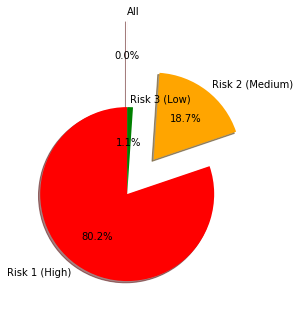

In [28]:
# Labels for the sections of our pie chart
labels = ["Risk 1 (High)", "Risk 2 (Medium)", "Risk 3 (Low)", "All"]

# The values of each section of the pie chart
sizes = total_risk

# The colors of each section of the pie chart
colors = ["red", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0,0.5,0,1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.savefig("Resources/Risk.png")

plt.show()

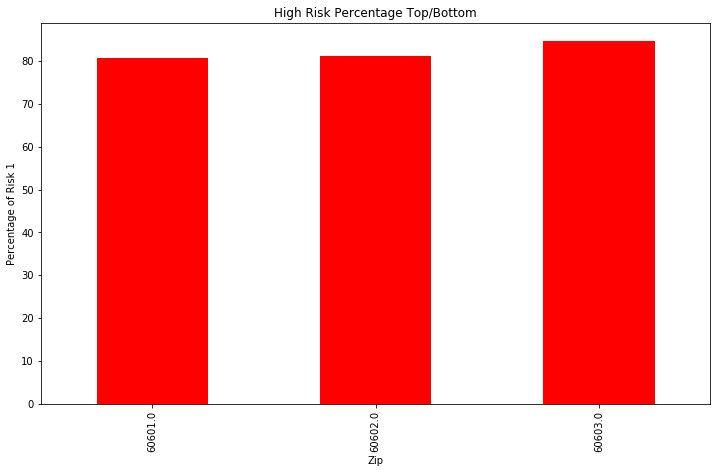

In [39]:
top_three = percent.head(3)





bottom_three = percent.tail(5)


#Second, we plot the points
top_three.plot(kind="bar", color="red", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("High Risk Percentage Top/Bottom")
plt.xlabel("Zip")
plt.ylabel("Percentage of Risk 1")

#show chart and set layout
plt.show()

